# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Cell to reference what's in the api
city = "Berlin"
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'

response = requests.get(city_url).json()
pprint(response)

{'cod': 401,
 'message': 'Invalid API key. Please see '
            'https://openweathermap.org/faq#error401 for more info.'}


In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']
        city_lng =  city_weather['coord']['lat']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['sys']['sunrise']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | sisimiut
Processing Record 3 of Set 1 | kuqa
Processing Record 4 of Set 1 | waingapu
Processing Record 5 of Set 1 | campbellton
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | poronaysk
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | trinidad
Processing Record 10 of Set 1 | yulinshi
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | glace bay
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | nelson bay
Processing Record 16 of Set 1 | botshabelo
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | gadzhiyevo
Processing Record 22 of Set 1 | huarmey
Processing R

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,42.6001,6.23,64,69,0.45,US,1711881536
1,sisimiut,66.9395,66.9395,-2.18,72,100,4.22,GL,1711961061
2,kuqa,41.7278,41.7278,5.95,61,100,5.31,CN,1711930255
3,waingapu,-9.6567,-9.6567,29.41,71,100,1.94,ID,1711922543
4,campbellton,48.0075,48.0075,-0.75,91,35,2.40,CA,1711879557


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,42.6001,6.23,64,69,0.45,US,1711881536
1,sisimiut,66.9395,66.9395,-2.18,72,100,4.22,GL,1711961061
2,kuqa,41.7278,41.7278,5.95,61,100,5.31,CN,1711930255
3,waingapu,-9.6567,-9.6567,29.41,71,100,1.94,ID,1711922543
4,campbellton,48.0075,48.0075,-0.75,91,35,2.40,CA,1711879557


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

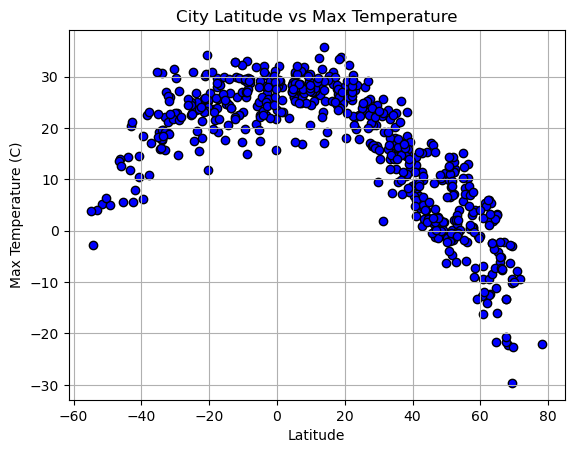

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color="b", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

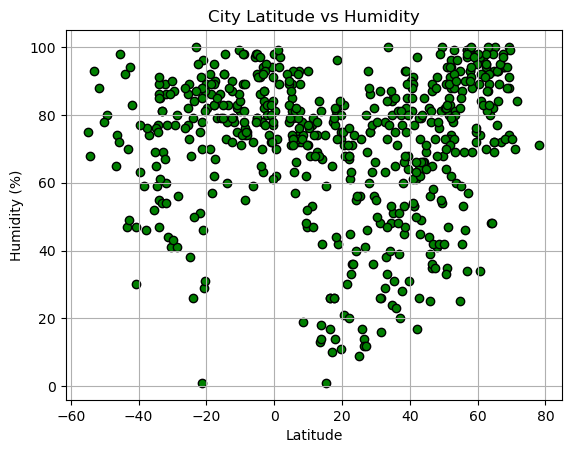

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c = "green", edgecolors="black")

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

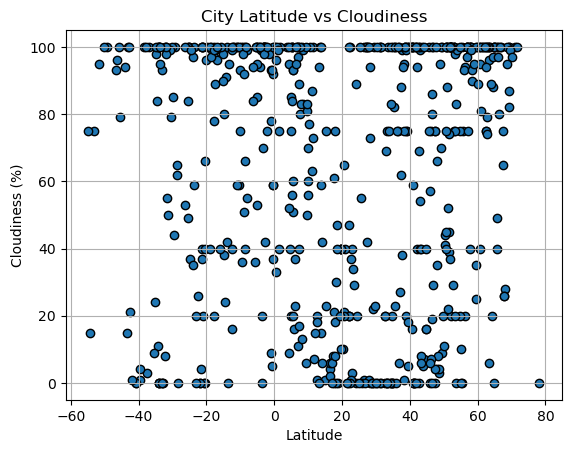

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

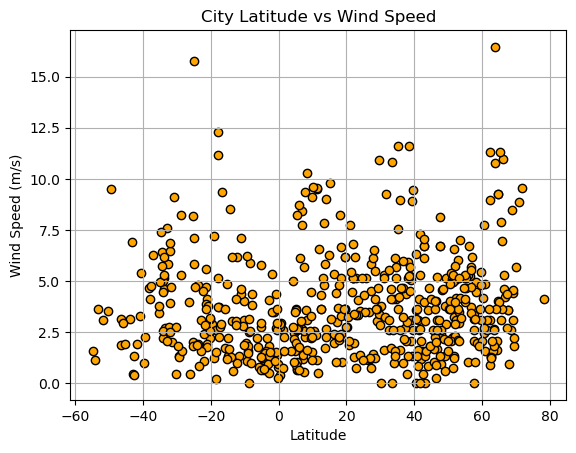

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],c = "orange", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def reg(x,y):
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    reg_vals = slope * x + intercept
    line_fit = f'y = {round(slope,2)}x + {round(intercept,2)}'
    return reg_vals, line_fit, rvalue

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,42.6001,6.23,64,69,0.45,US,1711881536
1,sisimiut,66.9395,66.9395,-2.18,72,100,4.22,GL,1711961061
2,kuqa,41.7278,41.7278,5.95,61,100,5.31,CN,1711930255
4,campbellton,48.0075,48.0075,-0.75,91,35,2.40,CA,1711879557
5,utrik,11.2278,11.2278,26.95,77,87,9.48,MH,1711910241


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waingapu,-9.6567,-9.6567,29.41,71,100,1.94,ID,1711922543
7,grytviken,-54.2811,-54.2811,-2.86,68,15,1.14,GS,1711961424
8,trinidad,-14.8333,-14.8333,24.82,92,38,1.33,BO,1711880680
10,west island,-12.1568,-12.1568,29.99,79,100,6.17,CC,1711928218
11,edinburgh of the seven seas,-37.0676,-37.0676,17.15,74,100,6.28,SH,1711954978


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8998128153641421


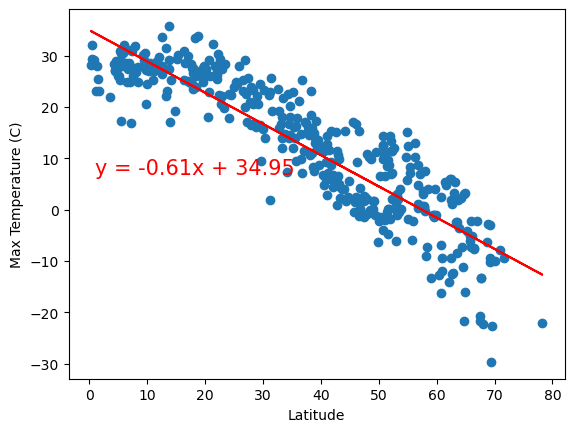

In [36]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
reg_vals, line_fit, rvalue = reg(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, reg_vals, color = "red")
plt.annotate(line_fit, xy = (1,7), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.show()

The r value is: 0.6544569722899272


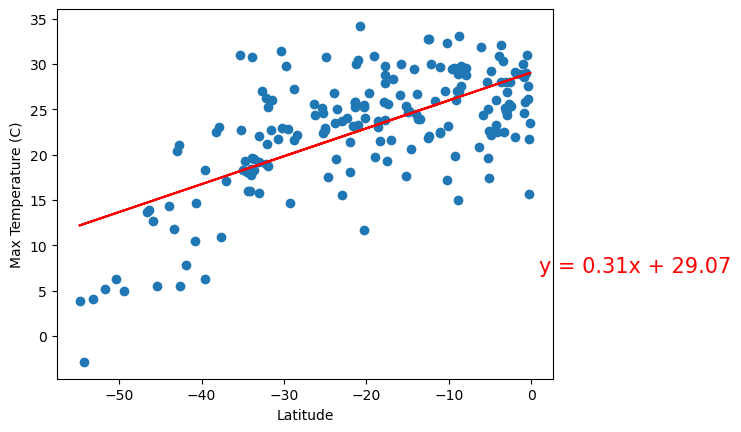

In [37]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
reg_vals, line_fit, rvalue = reg(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, reg_vals, color = "red")
plt.annotate(line_fit, xy = (1,7), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.show()

**Discussion about the linear relationship:** Due to the R values being quite similar and close to an absolute value of about a 0.7, we can safely assume that there is a strong relationship between a given city's distance to the equator, and it's average temperature. It is commonly known that places closer to the equator are generally warmer than those farther away due to getting hit more directly with the sun's rays, and the data we have seem to reinforce this idea; We can conclude that a closer a city is to the equator, the hotter the temperature will be.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.24538289552357279


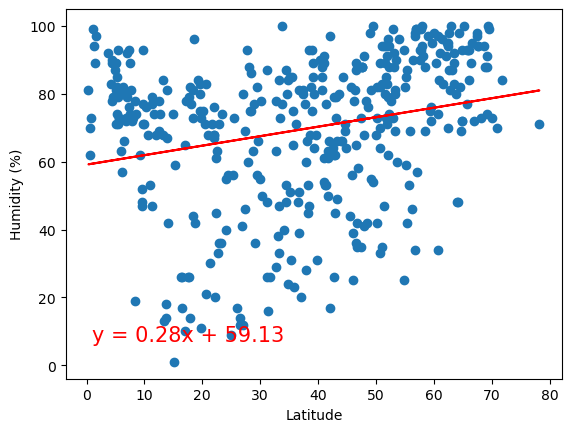

In [40]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
reg_vals, line_fit, rvalue = reg(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, reg_vals, color = "red")
plt.annotate(line_fit, xy = (1,7), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r value is: 0.27743234857209687


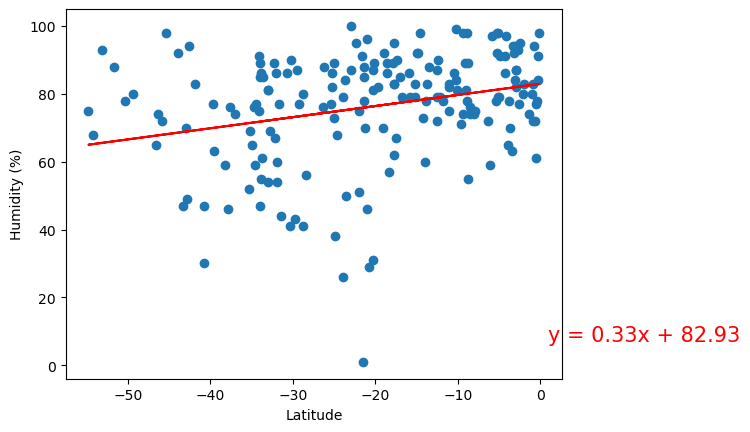

In [41]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
reg_vals, line_fit, rvalue = reg(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, reg_vals, color = "red")
plt.annotate(line_fit, xy = (1,7), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** There doesn't seem to be any strong correlation between the distance from the equator and the humidity of a plotted city, if the r values are to be believed. Humidity does come from the precipitation in the air, and one could say that location to water is equally as important as location to the equator for the information we are trying to garner from these graphs, but that is beyond the scope of what we can find from the data we have here. Despite that, it is probably safe to assume that distance from the equator doesn't necessarily correlate to any rise or fall in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.2045459616122408


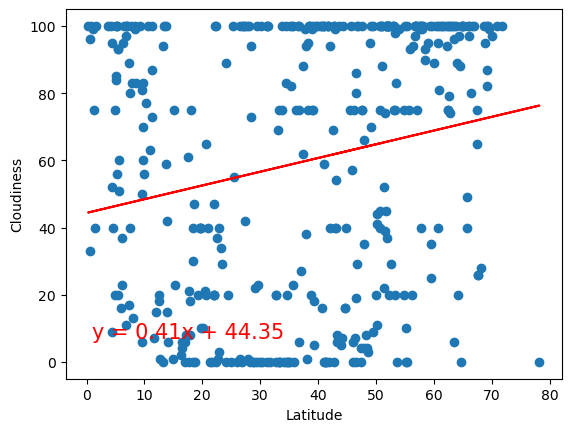

In [42]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
reg_vals, line_fit, rvalue = reg(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, reg_vals, color = "red")
plt.annotate(line_fit, xy = (1,7), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r value is: 0.18529020309930092


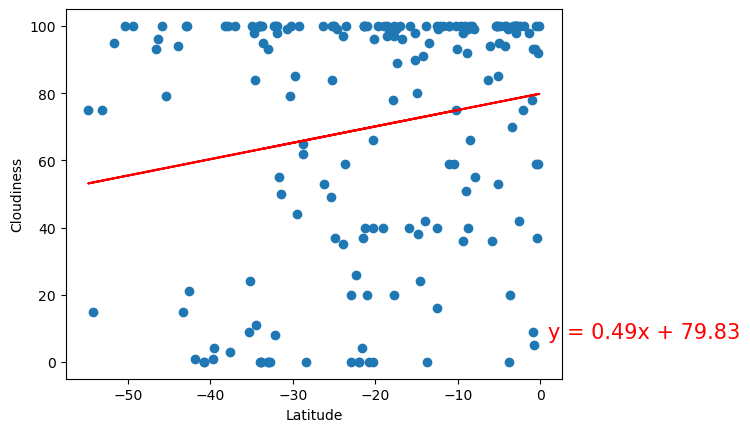

In [43]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
reg_vals, line_fit, rvalue = reg(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, reg_vals, color = "red")
plt.annotate(line_fit, xy = (1,7), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** The R Value is quite low for both of these graphs, meaning there isn't really much to talk about. While it's true that our line indicates that more clouds do appear closer to the equator, these graphs don't paint that picture. Safe to say, there is not a correlation between distance from the equator, and the cloudiness of an area.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.08654850058854266


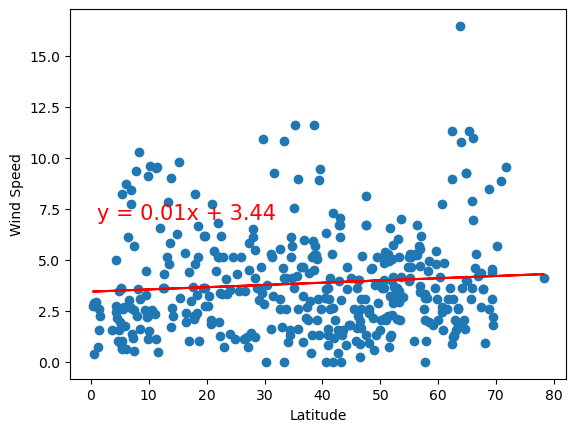

In [45]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
reg_vals, line_fit, rvalue = reg(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, reg_vals, color = "red")
plt.annotate(line_fit, xy = (1,7), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r value is: -0.23222105592627418


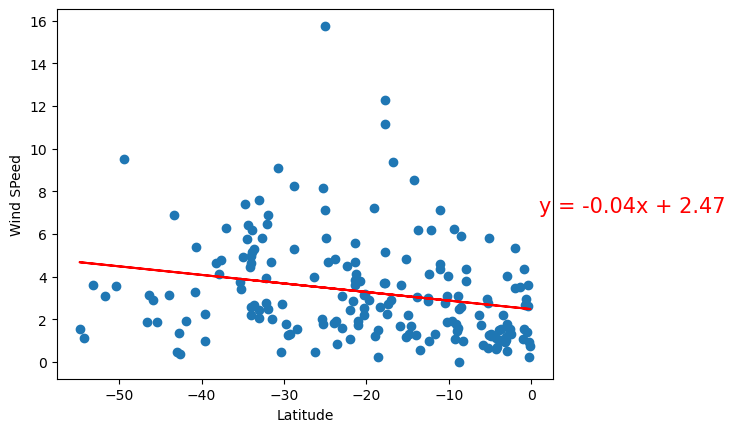

In [46]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
reg_vals, line_fit, rvalue = reg(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, reg_vals, color = "red")
plt.annotate(line_fit, xy = (1,7), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind SPeed")
plt.show()

**Discussion about the linear relationship:** These R values are even lower than what the graphs on cloudiness displayed. The R Values are extremely close to 0, and therefor wind speed and distance from the equator don't have any sort of relation.